In [1]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from concurrent.futures import ThreadPoolExecutor
from itertools import combinations
import concurrent.futures
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["malware"].find({})))

(0.0, 40.0)

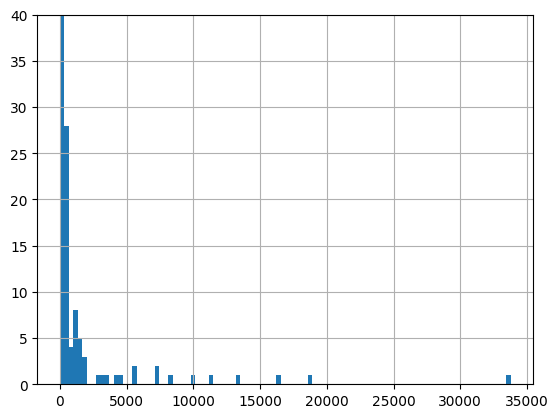

In [2]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]
malware_filtered = malware_filtered.dropna()
family_counts.hist(bins=100)
plt.ylim(0, 40)

In [3]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}"
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...
...,...,...,...,...,...,...,...,...,...,...
208641,658f24555f823237b2e23b36,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,NaN,NaN,NaN,NaN,{'strings': 'T173F301867C0624D5EBFFAEDB4D3A703...,NaN
208642,658f24555f823237b2e23b37,zxShell,fc3cacb2103adedc11720c34a243de58085c1a7283ba35...,204240,NaN,NaN,NaN,NaN,{'strings': 'T1BF62AFC75196B9D08B8A8F92E752A05...,NaN
208643,658f24555f823237b2e23b38,zxShell,dbd03093e58c2d60f4f47b720691cd3e6310f0566403ee...,1343952,NaN,NaN,NaN,NaN,{'strings': 'T1425302C618D220E6EF92DA1C95AB778...,NaN
208644,658f24555f823237b2e23b39,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,NaN,NaN,NaN,NaN,{'strings': 'T167B3E1E1659228B103A6CF4D5AE7770...,NaN


In [4]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 208646 rows.
Filtered DataFrame has 208644 rows.
Families removed (only had 1 entry): ['CyclopsBlink', 'Darkbit']


([], [])

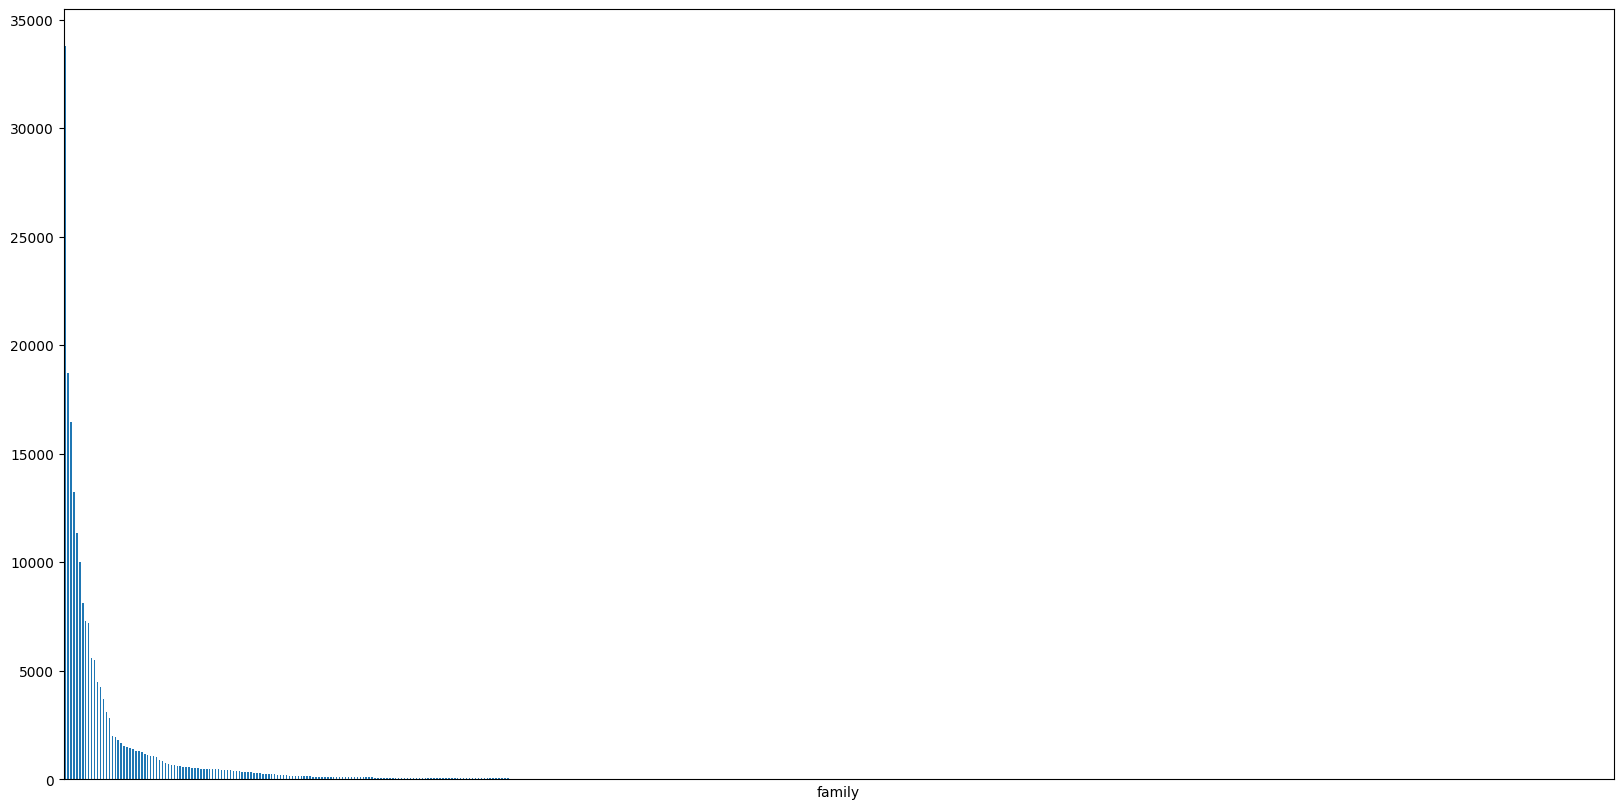

In [5]:
malware_filtered["family"].value_counts().plot(x="family", y="count", kind="bar", figsize=(20, 10))
plt.xticks([])

In [6]:
len(df["family"].unique())

527

In [7]:
malware_filtered["scicore"] = False
size = malware_filtered.shape[0] / 20
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}",False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...,False
...,...,...,...,...,...,...,...,...,...,...,...
1985,82,CapnProto,d371e548a0c3c38c8fd1939999f9b0dbe91853c1cd21c9...,302736,{'ssdeep': '6144:v83mjGvGtJO9M7kmfEBbIDa8Ll6Iw...,sdhash hash,{'tlsh': 'T1A554C82B255E5D37C987B0FE42C96233AF...,Machoc hash,{'strings': 'T1DCE3459A241E5D338E4730DE4299231...,NaN,True
1986,728,Chimera,9bc1a28fae47ef15bbec02d0c968812dbf4453f7306888...,5104,{'ssdeep': '96:yN2v3TCCvg7ytihAtMwXYpEreo6BM2I...,sdhash hash,{'tlsh': 'T1C2B131657336AF6D5EA7C0CE4F15A11E6A...,Machoc hash,{'strings': 'T14AA15269B332AF685DA7C4C68B14710...,NaN,True
1987,269,Stacks,212ef6a93df07d601393f71e51289621f18325a2b3a12f...,411064,{'ssdeep': '6144:ClBAik4vSdQEZ68SSo1BGWxs+1EtB...,sdhash hash,{'tlsh': 'T12694280BF6A718BCC8D6D730535B9436E9...,Machoc hash,{'strings': 'T141A3C7D3059B1CB45DE22754B32B612...,NaN,True
1988,625,UCX,138e9097341db19577181957e7a1f44fe70736e7087363...,4227784,{'ssdeep': '98304:ouItcWKjVnBft87WBBdCjb43Q1Y2...,sdhash hash,{'tlsh': 'T18F160755E79779D2C81ADAB8868F932072...,Machoc hash,{'strings': 'T143C4C7A4DA5728D2985E6A9CC34C334...,NaN,True


In [8]:
a = malware_concat
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a[a["SHA256"] == "0000015bf5f766e7a709983fe08a8d6983fb5d49213d4389871c2b69e6c19b25"]



,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
54788,65638d463624482ac9d26de7,Koadic,0000015bf5f766e7a709983fe08a8d6983fb5d49213d43...,138752,{'ssdeep': '3072:3U/9+vstGGGFOn+tdHhVfErWGQ+SB...,sdhash hash,{'tlsh': 'T1BAD3AE4376C25372E5C116B101A529BBEB...,Machoc hash,{'strings': 'T1A9421C8B18DA396AE1370522C6FCA18...,NaN,False


In [9]:
a = a[a['tlsh'] != 'TNULL']
(a["tlsh"] == "TNULL").sum()

0

In [10]:

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
filtered_df = a

In [11]:
(filtered_df["tlsh"] == "TNULL").sum()

0

In [12]:
"""def calculate_metrics(values, function):
    if not values:
        return np.nan, np.nan, np.nan, 0

    results = [function(a, b) for a, b in itertools.combinations(values, 2)]
    return np.mean(results), np.median(results), np.std(results), len(results)

def process_group(group):
    family = group['family'].iloc[0]
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    tlsh_mean, tlsh_median, tlsh_std, tlsh_amount = calculate_metrics(tlsh_values, tlsh.diff)
    ssdeep_mean, ssdeep_median, ssdeep_std, ssdeep_amount = calculate_metrics(ssdeep_values, ssdeep.compare)
    strings_mean, strings_median, strings_std, strings_amount = calculate_metrics(strings_values, tlsh.diff)

    return {
        'family': family,
        'tlsh': {'mean': tlsh_mean, 'median': tlsh_median, 'std': tlsh_std, 'amount': tlsh_amount},
        'ssdeep': {'mean': ssdeep_mean, 'median': ssdeep_median, 'std': ssdeep_std, 'amount': ssdeep_amount},
        'strings': {'mean': strings_mean, 'median': strings_median, 'std': strings_std, 'amount': strings_amount}
    }
"""
"""with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_group, [group for _, group in filtered_df.groupby('family')]))

# Transform results into DataFrames
fam_tlsh = pd.DataFrame([{'family': res['family'], **res['tlsh']} for res in results])
fam_ssdeep = pd.DataFrame([{'family': res['family'], **res['ssdeep']} for res in results])
fam_strings = pd.DataFrame([{'family': res['family'], **res['strings']} for res in results])"""
"""
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []
strings_data = []

for family, group in filtered_df.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)
    strings_combinations = itertools.combinations(strings_values, 2)
    

    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]
    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]
    

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })
    
    strings_data.append({
        'family': family,
        'values': strings_diffs,
        'mean': np.mean(strings_diffs) if strings_diffs else np.nan,
        'median': np.median(strings_diffs) if strings_diffs else np.nan,
        'std': np.std(strings_diffs) if strings_diffs else np.nan,
        'amount': len(strings_diffs)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)
fam_strings = pd.DataFrame(strings_data)
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()
fam_strings = fam_strings[fam_strings['amount'] > 1]
fam_strings[["mean","median","std"]].boxplot()"""

'\nimport itertools\n# Pre-calculate combinations for both tlsh and ssdeep\n\n# Assuming filtered_df, tlsh, ssdeep are defined elsewhere\n\n# Initialize lists to store data for DataFrame creation\ntlsh_data = []\nssdeep_data = []\nstrings_data = []\n\nfor family, group in filtered_df.groupby(\'family\'):\n    # Extract the values for tlsh and ssdeep\n    tlsh_values = group[\'tlsh\'].tolist()\n    ssdeep_values = group[\'ssdeep\'].tolist()\n    strings_values = group[\'strings\'].tolist()\n\n    # Calculate combinations and their respective differences/similarities\n    tlsh_combinations = itertools.combinations(tlsh_values, 2)\n    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)\n    strings_combinations = itertools.combinations(strings_values, 2)\n    \n\n    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]\n    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]\n    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]\n   

In [17]:
from tmp import subresult
import concurrent.futures

def tlsh_score(df, col="tlsh"):
    numi = df[[col, 'family', 'scicore', 'SHA256']].to_numpy()
    batch = 200
    total_batches = len(range(0, len(numi), batch))
    results = []
    completed_batches = 0
    
    with concurrent.futures.ProcessPoolExecutor(max_workers=32) as executor:
        future_results = [executor.submit(subresult, numi[i:i+batch],numi) for i in range(0, len(numi), batch)]
        for future in concurrent.futures.as_completed(future_results):
            try:
                results.extend(future.result())
            except Exception as e:
                print(f"Operation failed: {e}")
    return results



    
# Assuming you have 'filtered_df' defined somewhere before this point
results = tlsh_score(filtered_df)
results = pd.DataFrame(results, columns=["family1", "family2", "scicore1", "scicore2", "score"])
results


Completed 1/513 batches


,family1,family2,scicore1,scicore2,score
0,9002Rat,XdSpy,False,False,114
1,9002Rat,UsbCulprit,False,False,18
2,9002Rat,9002Rat,False,False,56
3,9002Rat,WpBruteBot,False,False,157
4,9002Rat,DiscordTokenStealers,False,False,157
...,...,...,...,...,...
195,Android.Hummingbad,Android.Hummingbad,False,False,1
196,Android.Hummingbad,Android.Hummingbad,False,False,2
197,Android.Hummingbad,Android.Hummingbad,False,False,1
198,Android.Hummingbad,Android.Hummingbad,False,False,5


In [16]:
def tlsh_comb(df=filtered_df, col='tlsh'):
    from itertools import combinations
    import math

    # Total number of combinations
    total_combinations = 19999900000  # Pre-calculated for 200,000 rows

    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'scicore']].iterrows(), 2)
    
    results = []
    for i, ((idx1, row1), (idx2, row2)) in enumerate(string_combinations, 1):
        diff_score = tlsh.diff(row1[col], row2[col])
        results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1[col], row2[col], diff_score))

        # Print progress every 1% of total combinations
        if i % (total_combinations // 100) == 0:
            progress_percent = (i / total_combinations) * 100
            print(f"Progress: {progress_percent:.2f}%")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df

results_tlsh = tlsh_comb()


In [ ]:
import pandas as pd
from itertools import combinations
import tlsh

def tlsh_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk(chunk):
        results = []
        for row1 in chunk.itertuples(index=False):
            for row2 in df.itertuples(index=False):
                try:
                    diff_score = tlsh.diff(row1.tlsh, row2.tlsh)
                    results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.tlsh, row2.tlsh, diff_score))
                except Exception as e:
                    print(f"Error processing row: {e}")
                    continue
        return results

    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'TLSH 1', 'TLSH 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_tlsh = tlsh_comb_chunked(filtered_df, chunk_size=100)
results_tlsh

: 

In [ ]:
def strings_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = tlsh.diff(row1.strings, row2.strings)
                results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.strings, row2.strings, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results

    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'strings 1', 'strings 2', 'Diff Score'])

    return results_df

results_strings = strings_comb_chunked(filtered_df, chunk_size=100)
results_strings

: 

In [ ]:
p = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
(p["Family 1"] == p["Family 2"]).value_counts()

: 

In [ ]:
tmp = results_tlsh[results_tlsh["Family 1"] == "9002Rat"]
len(tmp["Family 2"].unique())

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
s = results_strings.loc[results_strings.groupby("strings 1")["Diff Score"].idxmin()]
(s["Family 1"] == s["Family 2"]).value_counts()

: 

In [ ]:
def tlsh_thresh(s, by="TLSH 1"):
    s = s.loc[s.groupby(by)["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb_chunked(filtered_df, chunk_size=100))
s = tlsh_thresh(strings_comb_chunked(filtered_df, chunk_size=100), by="strings 1")
s

: 

In [ ]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for TLSH", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0] - 1, 15):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i > 100:
        break
plt.show()

: 

In [ ]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for strings", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0] - 1, 15):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i > 100:
        break
plt.show()

: 

In [ ]:
def tlsh_f1(s, by="TLSH 1"):
    s = s.loc[s.groupby(by)["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (1,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy]
    return ssdeep_th
f = tlsh_f1(tlsh_comb_chunked(filtered_df, chunk_size=100))
f.plot(x="threshold", y=["f1","accuracy"],title="F1 Score and Accuracy for TLSH")

: 

In [ ]:
def ssdeep_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk_ssdeep(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = ssdeep.compare(row1.ssdeep, row2.ssdeep)
                if diff_score == 0:
                    results.append((row1.family, "No Match", row1.scicore, row2.scicore, row1.ssdeep, row2.ssdeep, diff_score))
                else:
                    results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.ssdeep, row2.ssdeep, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results
    #df['ssdeep'] = df['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)
    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk_ssdeep(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'ssdeep 1', 'ssdeep 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_ssdeep = ssdeep_comb_chunked(filtered_df, chunk_size=100)
results_ssdeep

: 

In [ ]:
results_ssdeep[results_ssdeep["Family 1"] == "Predator the Thief"]["Diff Score"].idxmax()

: 

In [ ]:
results_ssdeep.iloc[4202845]

: 

In [ ]:
s = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
s[s["Family 1"] == "Predator the Thief"]

: 

In [ ]:
size = s.shape[0]
s = s[s["Scicore 2"] == False]
(s["Family 1"] == s["Family 2"]).value_counts()

: 

In [ ]:
def ssdeep_thresh(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = ssdeep_thresh(ssdeep_comb_chunked(filtered_df, chunk_size=100))
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)

: 

In [ ]:
# Plot the ROC curve in range 0.1 to 1.0
ax = p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)
for i in range(p.shape[0]- 1,0, -10):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i < 80:
        break
# add a dotet line with y = x for comparison
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

: 

In [ ]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

: 

In [ ]:
def ssdeep_f1(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy]
    return ssdeep_th
p = ssdeep_f1(ssdeep_comb_chunked(filtered_df, chunk_size=100))
p.plot(x="threshold", y=["f1","accuracy"],title="F1 Score and Accuracy for ssdeep")

: 

In [ ]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]

tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < 400]
tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]

ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] > 0]

(ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)

: 

In [ ]:
len(ssdeep_comp_diff) / len(ssdeep_comp)

: 

In [ ]:
intersect = set(tlsh_comp_diff["Family 1"]) & set(ssdeep_comp_diff["Family 1"])
union = set(tlsh_comp_diff["Family 1"]) | set(ssdeep_comp_diff["Family 1"])
len(union - intersect) / len(union)


: 

In [ ]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
strings_comp = results_strings.loc[results_strings.groupby('strings 1')["Diff Score"].idxmin()]
tls = []
ssd = []
strs = []
for i in range (0,300,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    str_comp_diff = strings_comp[strings_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]
    str_comp_diff = str_comp_diff[str_comp_diff["Scicore 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (str_comp_diff["Family 1"] == str_comp_diff["Family 2"]).sum() / len(str_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(str_comp_diff) / len(strings_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh,i))
    strs.append((winrate_str, 1-winrate_str, total_str,i))
for j in range (0,110,1):
    ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Scicore 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_comp)
    ssd.append((winrate, 1-winrate, total,j))

: 

In [ ]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
stsr = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])
#ti = titi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for TLSH")
#si = sisi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for ssdeep")

plt.clf()
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="winrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="lossrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="winrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="lossrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
ax[2].plot(stsr["threshold"], stsr["winrate"], label="winrate")
ax[2].plot(stsr["threshold"], stsr["lossrate"], label="lossrate")
ax[2].plot(stsr["threshold"], stsr["total"], label="total")
ax[2].legend()
ax[2].set_title("EDI Curve for strings")
ax[2].set_xlabel("Threshold")
ax[2].set_ylabel("Percentage")
plt.show()

: 